In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
##Importing the libraries

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.7.0'

In [65]:
pandas.__version__

'1.3.0'

In [ ]:
##Loading the Images

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
path='/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images'

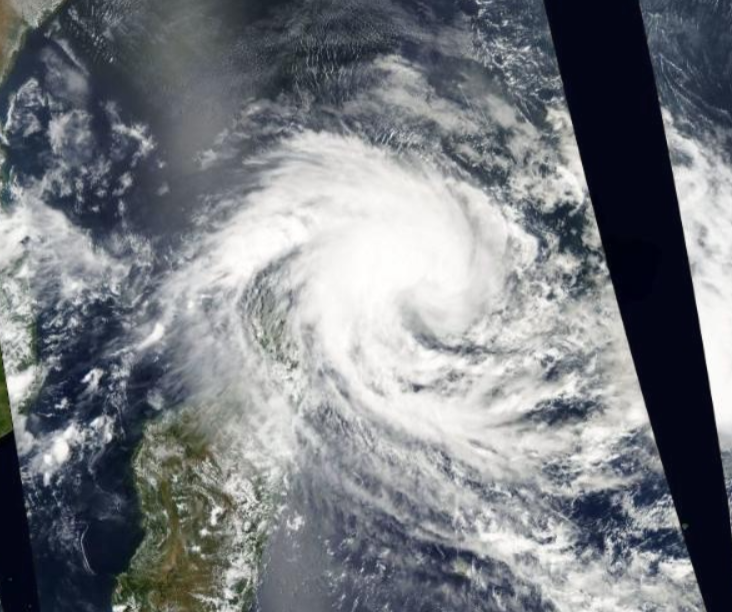

In [78]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Severe Tropical Storm_SS/STS-Feb10-SS-2003.png')

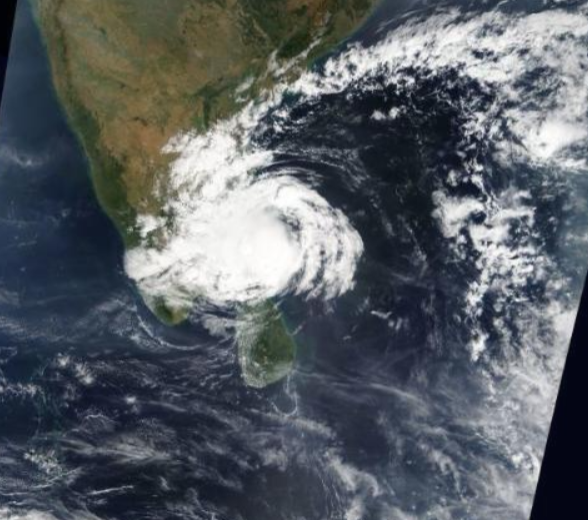

In [79]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Tropical Depression_D/TD-Dec12-11.30-D-2013.png')

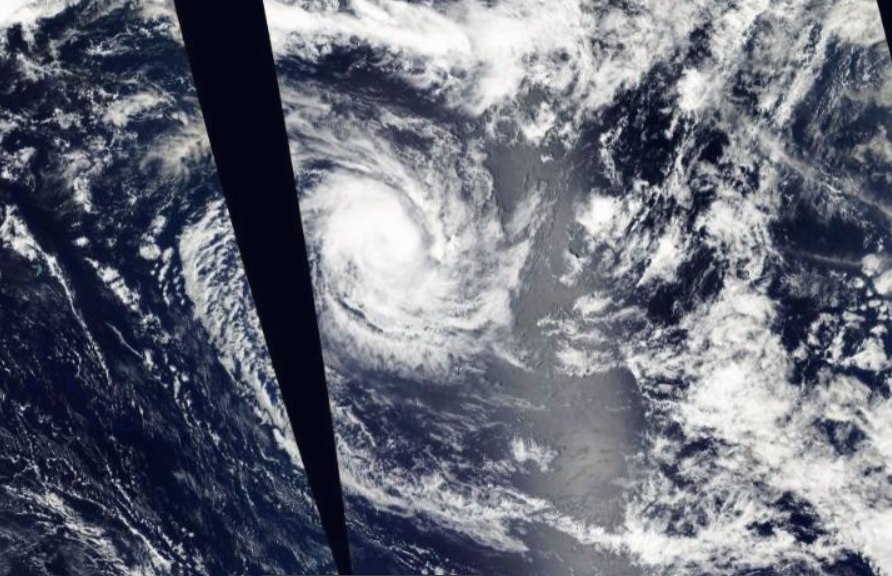

In [80]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Tropical Storm_S/TS-Dec17-S-2013.png')


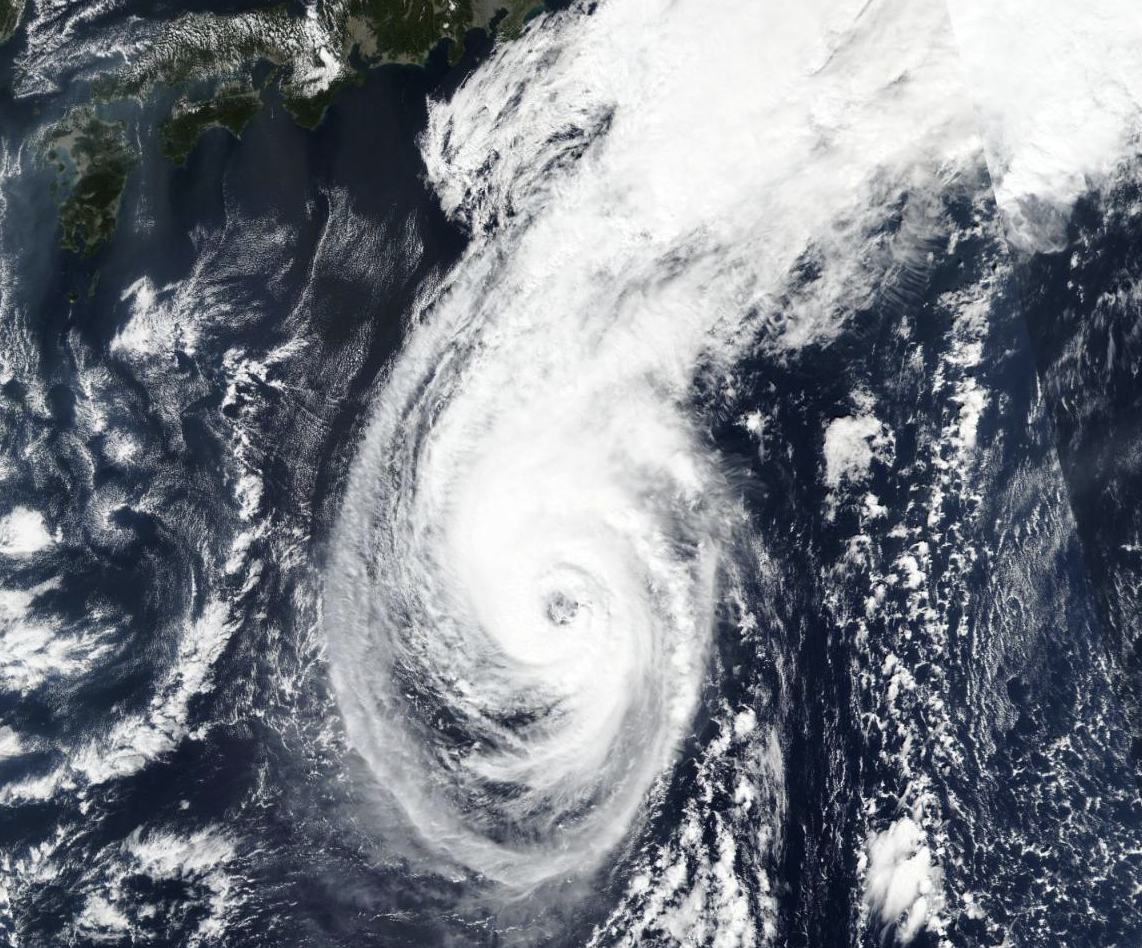

In [81]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Typhoon_T/Screenshot 2021-12-22 at 6.23.43 PM.png')

In [82]:
training_datagenerator = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=7,
                                   horizontal_flip= True)

In [83]:
train_dataset=training_datagenerator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train',
                                                         target_size=(64,64),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         shuffle=True)

Found 160 images belonging to 4 classes.


In [84]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3], dtype=int32)

In [85]:
train_dataset.class_indices

{'Severe Tropical Storm_SS': 0,
 'Tropical Depression_D': 1,
 'Tropical Storm_S': 2,
 'Typhoon_T': 3}

In [86]:
test_datagenrator=ImageDataGenerator(rescale = 1./255)

In [87]:
test_dataset=training_datagenerator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test',
                                                        target_size=(64,64),
                                                        batch_size=1,
                                                        class_mode='categorical',
                                                        shuffle=False)

Found 80 images belonging to 4 classes.


In [ ]:
##BUILDING AND TRAINING THE neural NETWORK

In [90]:
#num of inputs+num out put/2
(1152+4)/2


578.0

In [91]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Flatten())

classifier.add(Dense(units=578, activation='relu'))
classifier.add(Dense(units=578, activation='relu'))
classifier.add(Dense(units=4, activation='softmax'))

classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 32)        

In [92]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
hist=classifier.fit_generator(train_dataset,epochs=60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/60
5/5 [==============================] - 8s 1s/step - loss: 0.1755 - accuracy: 0.9375
Epoch 2/60
5/5 [==============================] - 5s 950ms/step - loss: 0.1724 - accuracy: 0.9312
Epoch 3/60
5/5 [==============================] - 5s 995ms/step - loss: 0.1364 - accuracy: 0.9625
Epoch 4/60
5/5 [==============================] - 5s 976ms/step - loss: 0.1461 - accuracy: 0.9375
Epoch 5/60
5/5 [==============================] - 5s 950ms/step - loss: 0.1953 - accuracy: 0.9125
Epoch 6/60
5/5 [==============================] - 5s 953ms/step - loss: 0.1708 - accuracy: 0.9438
Epoch 7/60
5/5 [==============================] - 5s 992ms/step - loss: 0.0881 - accuracy: 0.9750
Epoch 8/60
5/5 [==============================] - 5s 966ms/step - loss: 0.1416 - accuracy: 0.9438
Epoch 9/60
5/5 [==============================] - 5s 996ms/step - loss: 0.1940 - accuracy: 0.9187
Epoch 10/60
5/5 [==============================] - 5s 984ms/step - loss: 0.0891 - accuracy: 0.9625
Epoch 11/60
5/5 [=====

KeyError: ignored

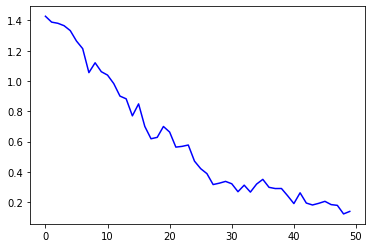

In [103]:
#ploting trsults with accuracy
plt.plot(hist.history['loss'],color='blue',label='train')
plt.plot(hist.history['val_loss'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test loss with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test loss epochs',fontsize=12)


In [ ]:
#ploting trsults with accuracy
plt.plot(hist.history['accuracy'],color='blue',label='train')
plt.plot(hist.history['val_accuracy'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test accuracy with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test accuracy',fontsize=12)


In [104]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
#plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('Training and validation loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()


KeyError: ignored

In [ ]:
##Evaluating the neural Network

In [106]:
test_dataset.class_indices

{'Severe Tropical Storm_SS': 0,
 'Tropical Storm_S': 1,
 'Tropical_Depression_D': 2,
 'Typhoon_T': 3}

In [107]:
predictions=classifier.predict(test_dataset)
predictions

array([[7.30940653e-03, 1.48264901e-03, 8.68265629e-01, 1.22942321e-01],
       [9.73138571e-01, 8.12118116e-04, 2.60138605e-02, 3.53602845e-05],
       [8.96265328e-01, 1.58525761e-02, 8.78821388e-02, 9.30591604e-09],
       [1.27248513e-05, 3.92450899e-01, 1.85927823e-02, 5.88943660e-01],
       [6.92284286e-01, 1.71713326e-02, 2.90544391e-01, 2.74490630e-09],
       [9.24276292e-01, 9.03983694e-03, 6.78134558e-04, 6.60056621e-02],
       [1.44660617e-05, 9.23475742e-01, 7.63660446e-02, 1.43753423e-04],
       [7.41457552e-06, 9.92585480e-01, 7.40202423e-03, 4.94485585e-06],
       [7.96481956e-08, 7.50146512e-07, 1.10683559e-05, 9.99988079e-01],
       [1.01119035e-07, 1.20518996e-06, 5.88864395e-06, 9.99992847e-01],
       [3.68422616e-06, 2.61189962e-06, 9.24808319e-06, 9.99984503e-01],
       [2.00795243e-04, 1.94172874e-01, 8.05625498e-01, 7.39322161e-07],
       [7.87178636e-01, 1.96300134e-01, 1.65141076e-02, 7.12545125e-06],
       [9.52718377e-01, 1.25385784e-02, 3.47407460e

In [108]:
predictions=np.argmax(predictions,axis=1)
predictions

array([2, 0, 0, 3, 0, 0, 1, 1, 3, 3, 3, 2, 0, 0, 3, 0, 0, 2, 2, 0, 0, 2,
       1, 3, 0, 1, 2, 3, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 3, 1, 2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3])

In [110]:
test_dataset.class_indices

{'Severe Tropical Storm_SS': 0,
 'Tropical Storm_S': 1,
 'Tropical_Depression_D': 2,
 'Typhoon_T': 3}

In [111]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.45

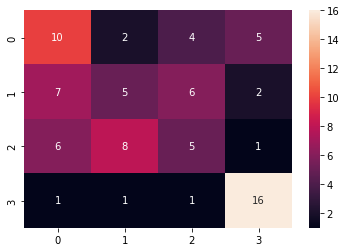

In [113]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm,annot=True)

In [114]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.42      0.48      0.44        21
           1       0.31      0.25      0.28        20
           2       0.31      0.25      0.28        20
           3       0.67      0.84      0.74        19

    accuracy                           0.45        80
   macro avg       0.43      0.45      0.44        80
weighted avg       0.42      0.45      0.43        80

